# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# IMPORTANT: pip install citipy in terminal

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
city_lats = []
city_lngs = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    citydict = city.__dict__
    # create a list of lat and longs for each city
    city_lats.append(citydict['lat'])
    city_lngs.append(citydict['lng'])
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.city_name)
    # DEBUGGING please disregard
    print(city.city_name)
    # print(city.__dict__)
    # break

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


san antonio de pale
margaret river
san angelo
blackmans bay
ushuaia
cartagena
port elizabeth
kasane
port elizabeth
ormara
novo cruzeiro
jijiga
blackmans bay
longyearbyen
nueva gerona
crane
dryden
edinburgh of the seven seas
xunchang
puerto natales
kodiak
oliver
adamstown
yanjiang
port-aux-francais
hadibu
blackmans bay
port-aux-francais
kunigal
la passe
taoudenni
olyokminsk
waitangi
port mathurin
kailua-kona
thompson
blackmans bay
stanley
jamestown
sitia
chervonohrad
adamstown
east ballina
pisco
talcahuano
bredasdorp
san jose de jachal
jamestown
port-aux-francais
nenjiang
port-aux-francais
port alfred
waitangi
vilyuchinsk
chonchi
port mathurin
port-aux-francais
bilibino
port-aux-francais
grytviken
aasiaat
'ohonua
port elizabeth
los frentones
mananjary
waitangi
remire-montjoly
yellowknife
linton military camp
mayya
udachny
novoshakhtinskiy
tiksi
adamstown
ipubi
walvis bay
avarua
bilibino
west island
salekhard
ribeira grande
norilsk
saint-pierre
remire-montjoly
buala
qaqortoq
adamstown
ma

### ---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# debugging 401 error please disregard
# ?q={city_name}&appid={weather_api_key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    # print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})   
        
    # more debugging please disregard
    # if response.ok:
    #     city_weather = response.json()
    # else:
    #     print(response.status_code)
    #     city_weather = []
        
    # print(city_weather)
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # break
     
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | san angelo
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | cartagena
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | kasane
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | ormara
Processing Record 11 of Set 1 | novo cruzeiro
Processing Record 12 of Set 1 | jijiga
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | nueva gerona
Processing Record 16 of Set 1 | crane
Processing Record 17 of Set 1 | dryden
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | xunchang
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | kodiak
Processing Record 22 o

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          483
Lat           483
Lng           483
Max Temp      483
Humidity      483
Cloudiness    483
Wind Speed    483
Country       483
Date          483
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,27.93,77,99,2.55,GQ,1706674458
1,margaret river,-33.9500,115.0667,27.82,53,0,5.57,AU,1706674363
2,san angelo,31.4638,-100.4370,11.14,54,0,3.09,US,1706674459
3,blackmans bay,-43.0167,147.3167,22.07,55,84,1.34,AU,1706674459
4,ushuaia,-54.8000,-68.3000,8.81,71,0,10.29,AR,1706674460


In [32]:
# Export the City_Data into a csv
# Moved CSV file to current folder to simplify
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,27.93,77,99,2.55,GQ,1706674458
1,margaret river,-33.9500,115.0667,27.82,53,0,5.57,AU,1706674363
2,san angelo,31.4638,-100.4370,11.14,54,0,3.09,US,1706674459
3,blackmans bay,-43.0167,147.3167,22.07,55,84,1.34,AU,1706674459
4,ushuaia,-54.8000,-68.3000,8.81,71,0,10.29,AR,1706674460


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

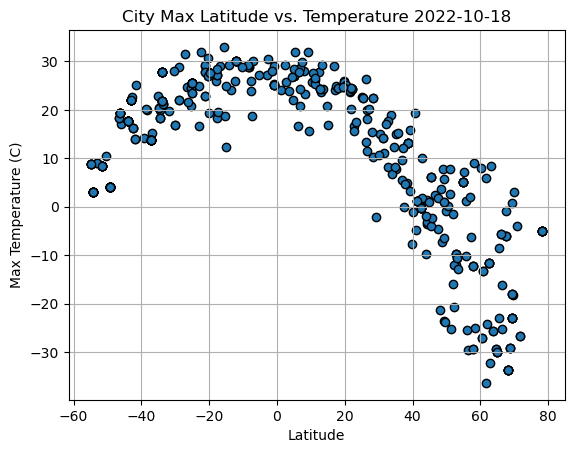

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", edgecolor = 'black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature 2022-10-18")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

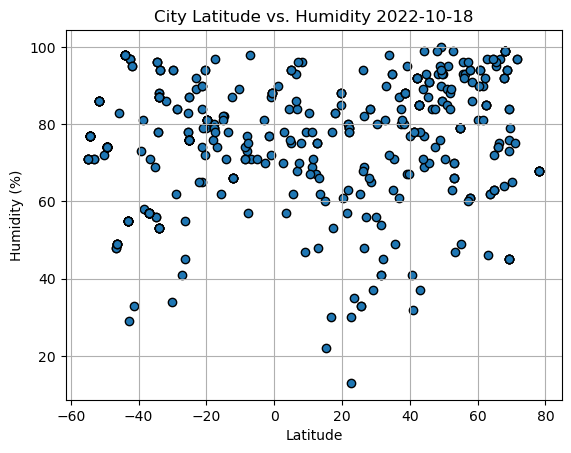

In [36]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolor = 'black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity 2022-10-18")



# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

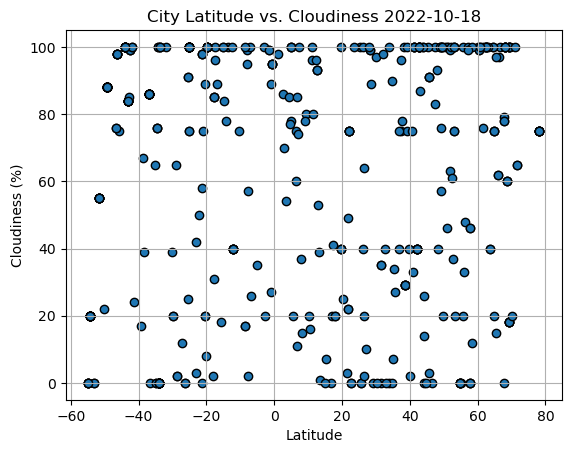

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolor = 'black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness 2022-10-18")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

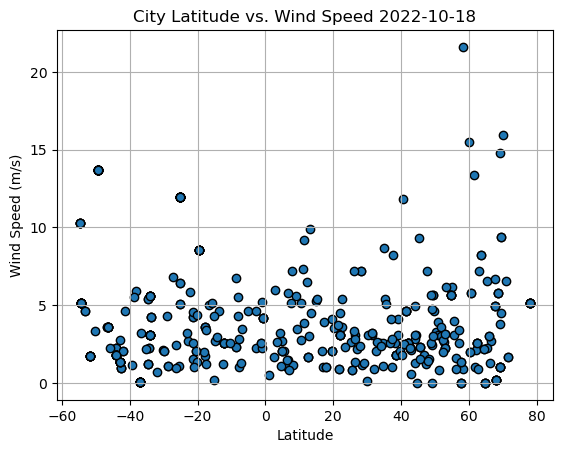

In [40]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolor = 'black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed 2022-10-18")
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san angelo,31.4638,-100.4370,11.14,54,0,3.09,US,1706674459
5,cartagena,10.3997,-75.5144,25.79,83,20,5.14,CO,1706674370
9,ormara,25.2088,64.6357,22.62,62,100,2.64,PK,1706674462
11,jijiga,9.3500,42.8000,15.62,78,80,3.46,ET,1706674463
13,longyearbyen,78.2186,15.6401,-5.09,68,75,5.14,SJ,1706674464


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,27.93,77,99,2.55,GQ,1706674458
1,margaret river,-33.9500,115.0667,27.82,53,0,5.57,AU,1706674363
3,blackmans bay,-43.0167,147.3167,22.07,55,84,1.34,AU,1706674459
4,ushuaia,-54.8000,-68.3000,8.81,71,0,10.29,AR,1706674460
6,port elizabeth,-33.9180,25.5701,21.29,88,0,3.09,ZA,1706674461


###  Temperature vs. Latitude Linear Regression Plot

In [47]:
# Define a function to create Linear Regression plots
def linreg(df,column_name,arg_x,arg_y):
    x = df['Lat']
    y = df[column_name]
    linregressresult = linregress(x,y)
    r_value = linregressresult.rvalue
    print(f'The r-value is: {r_value}')
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept
    line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the data points
    
    plt.scatter(x,y,)
    plt.plot(x, regression_line, color='red', label='y= ')
    plt.annotate(line,(arg_x,arg_y), fontsize = 15, color = 'red')
    
    plt.xlabel('Latitude')
    plt.ylabel(column_name)

The r-value is: -0.8572390262980963


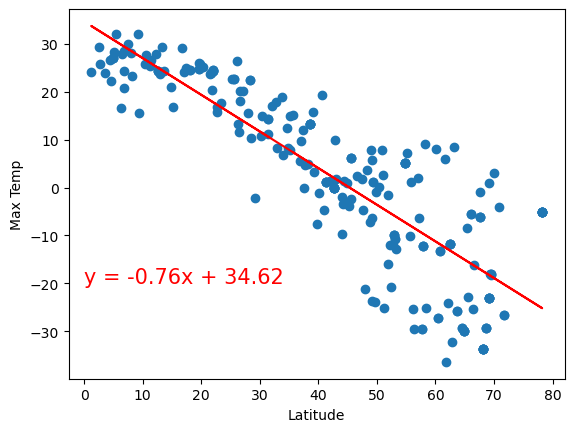

In [49]:
# Linear regression on Northern Hemisphere
linreg(df=northern_hemi_df, column_name="Max Temp", arg_x = 0, arg_y = -20)

The r-value is: 0.8185501938702799


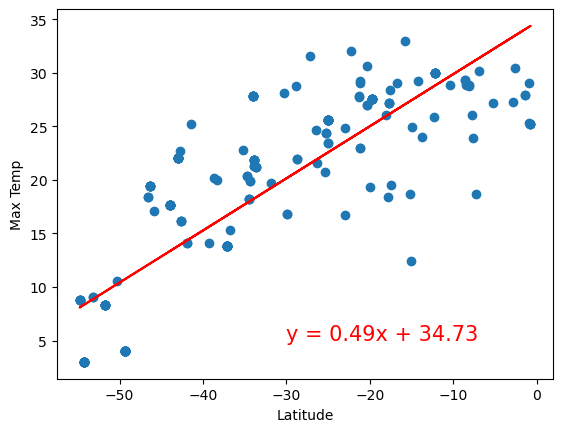

In [53]:
# Linear regression on Southern Hemisphere
linreg(df=southern_hemi_df, column_name="Max Temp", arg_x = -30, arg_y = 5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18358432251488283


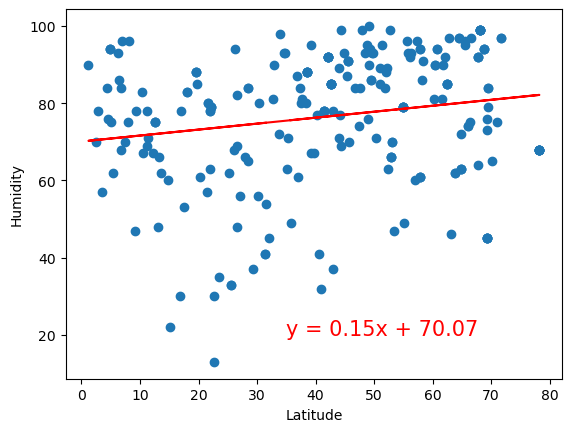

In [56]:
# Northern Hemisphere
linreg(df=northern_hemi_df, column_name="Humidity", arg_x = 35, arg_y = 20)

The r-value is: 0.10789777561510305


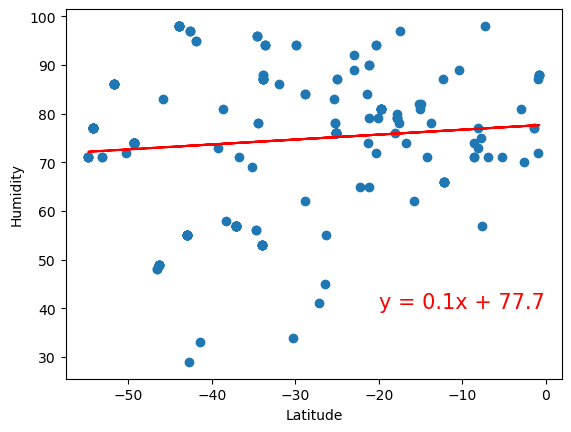

In [59]:
# Southern Hemisphere
linreg(df=southern_hemi_df, column_name="Humidity", arg_x = -20, arg_y = 40)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14661934369006632


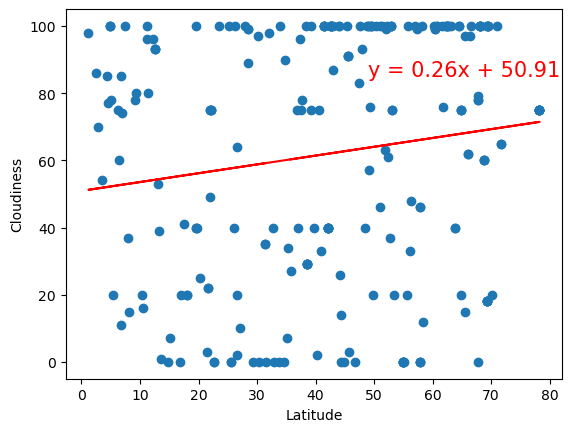

In [65]:
# Northern Hemisphere
linreg(df=northern_hemi_df, column_name="Cloudiness", arg_x = 49, arg_y = 85)

The r-value is: 0.0979034333561531


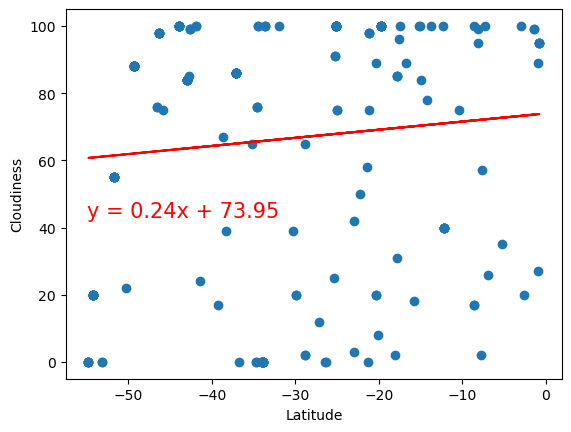

In [71]:
# Southern Hemisphere
linreg(df=southern_hemi_df, column_name="Cloudiness", arg_x = -55, arg_y = 43)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11048280367379618


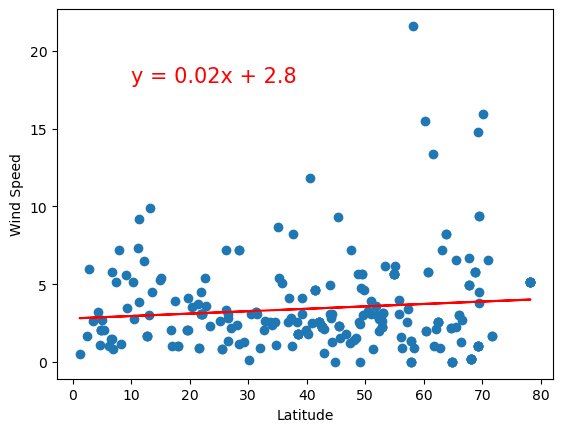

In [74]:
# Northern Hemisphere
linreg(df=northern_hemi_df, column_name="Wind Speed", arg_x = 10, arg_y = 18)

The r-value is: -0.20702393144025238


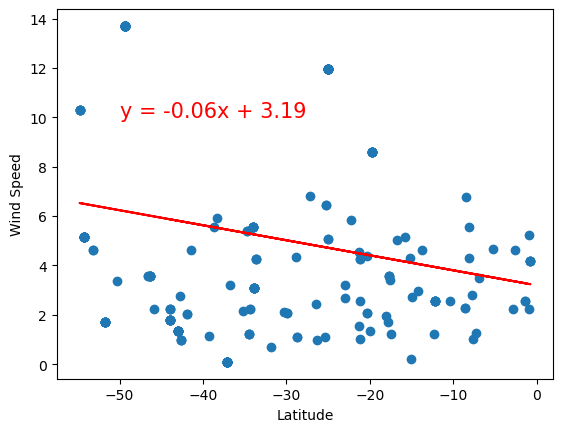

In [76]:
# Southern Hemisphere
linreg(df=southern_hemi_df, column_name="Wind Speed", arg_x = -50, arg_y = 10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE